# Exploratory Data Analysis 
Using the following data set [dataset](https://physionet.org/content/eeg-power-anesthesia/1.0.0/).

This is a starting point to do further EDA.

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import regex as re
sns.set()

In [2]:
df_data_54_EEGquality = pd.read_csv('../EEG data/multitaper-spectra-recorded-during-gabaergic-anesthetic-unconsciousness-1.0.0/OR/54_EEGquality.csv')
df_data_54_f = pd.read_csv('../EEG data/multitaper-spectra-recorded-during-gabaergic-anesthetic-unconsciousness-1.0.0/OR/54_f.csv')
df_data_54_l = pd.read_csv('../EEG data/multitaper-spectra-recorded-during-gabaergic-anesthetic-unconsciousness-1.0.0/OR/54_l.csv')
df_data_54_Sdb = pd.read_csv('../EEG data/multitaper-spectra-recorded-during-gabaergic-anesthetic-unconsciousness-1.0.0/OR/54_Sdb.csv')
df_data_54_t = pd.read_csv('../EEG data/multitaper-spectra-recorded-during-gabaergic-anesthetic-unconsciousness-1.0.0/OR/54_t.csv')

df_data = pd.concat([df_data_54_t, df_data_54_f, df_data_54_l, df_data_54_EEGquality], axis=1)
df_data.columns = ['time', 'frequency', 'state', 'EEG_quality']

# Understand the data more

For patient 54 the following are the lengths of the dataframes:
* EEGquality: 2639
* Frequency: 99 (100 different frequency bins)
* State: 3809
* Sdb: 99 (2640 columns)
* Time: 2639

From the above, we see:
* EEGquality can be mapped to time.
* The Sdb columns can be mapped to time. The columns seem to coinside with the frequency bins

3809/2 = 1904

Questions:
* Why is "State" not matching any other format

## Preprocessing

We see that Frequency and Sdb are missing one row. It is observed that this missing row has become the column values. Therefore, this requires preprocessing.

In [3]:
def column_offset(df, column_name):
    df_pp = df.copy()                           # copying the original frame
    extra_row = df_pp.columns                   # defining the row
    extra_row_float = []
    match = '[-]*\d+.\d+e[+|-]\d*'

    for row in extra_row:
        row_clean = re.findall(match, row)[0]
        extra_row_float.append(float(row_clean))

    df_pp.loc[-1] = extra_row_float             # adding a row
    df_pp.index = df_pp.index + 1               # shifting index
    df_pp = df_pp.sort_index()                  # sorting by index
    df_pp.columns = column_name                 # changing the column name
    return df_pp


In [4]:
df_data_54_f_pp = column_offset(df_data_54_f, ['frequency'])
df_data_54_t_pp = column_offset(df_data_54_t, ['time'])
df_data_54_Sdb_pp = column_offset(df_data_54_Sdb, [x for x in range(len(df_data_54_Sdb.columns))]).T
df_data_54_Sdb_pp

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,19.646910,22.279932,19.669255,20.374995,10.166054,5.304057,2.925788,1.616309,0.998081,0.607767,...,2.782164,2.840666,3.081557,3.126502,3.221306,3.424083,3.612387,3.924430,8.242659,9.105916
1,-9.091850,-6.042001,-7.191600,-8.711261,-25.315720,-21.968336,-23.405794,-23.134181,-24.184191,-24.369796,...,-31.823899,-27.243263,-26.560785,-26.533318,-28.602184,-30.790598,-26.250592,-28.458063,3.086238,7.712991
2,-3.057215,-0.667891,-3.209077,-2.930555,-7.675705,-10.935763,-13.716603,-17.590980,-20.422390,-18.452182,...,-19.762629,-18.690782,-16.645598,-15.711810,-16.171691,-15.829478,-12.004691,-7.346504,-4.051258,-1.968446
3,-366.244143,-363.302566,-364.513411,-366.124840,-374.445609,-376.687105,-378.545030,-381.164280,-381.231829,-383.496222,...,-402.376635,-402.609138,-402.499421,-402.744940,-402.746288,-402.789684,-403.002542,-402.895073,-403.136891,-403.123126
4,-366.244143,-363.302566,-364.513411,-366.124840,-374.445609,-376.687105,-378.545030,-381.164280,-381.231829,-383.496222,...,-402.376635,-402.609138,-402.499421,-402.744940,-402.746288,-402.789684,-403.002542,-402.895073,-403.136891,-403.123126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,23.175624,25.931672,22.812471,23.087551,19.949978,13.120249,7.827302,7.837492,5.381195,2.818261,...,-6.963672,-7.771979,-8.713501,-10.176798,-10.581801,-10.620674,-6.818561,-6.169721,-4.753362,-4.470718
2636,16.587987,16.464090,16.934720,17.895570,17.470303,14.566082,12.622060,10.030116,7.112139,7.370875,...,-8.217665,-9.079738,-9.161543,-10.449712,-9.817488,-9.681943,-9.300102,-9.053502,-9.148183,-9.936260
2637,6.885601,9.973777,7.699264,7.827011,5.872801,5.104740,2.797551,4.069534,4.046611,4.596304,...,-7.303246,-7.425121,-7.230768,-6.185128,-8.814230,-10.093559,-10.344499,-8.425415,-7.944105,-7.256184
2638,1.208293,5.647026,3.617081,4.072597,2.798042,1.766847,-1.522482,-1.085840,1.815428,1.880193,...,-7.812110,-7.681493,-8.563197,-8.005022,-8.439527,-9.110346,-10.881958,-7.345639,-8.111492,-5.888279


Text(0.5, 0, 'Time [2 s]')

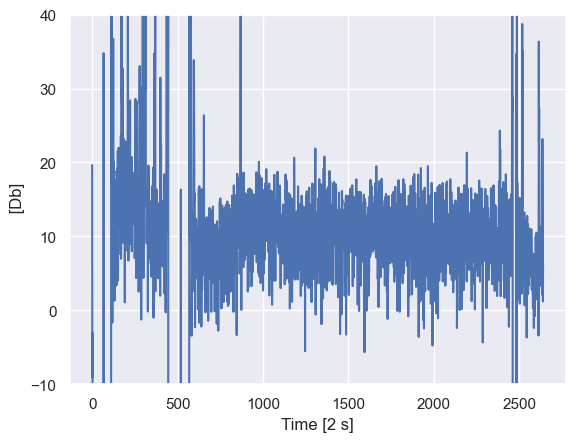

In [31]:
ax = sns.lineplot(x=df_data_54_Sdb_pp.index, y=df_data_54_Sdb_pp[0])
ax.set_ylim(-10,40)
ax.set_ylabel(' [Db]')
ax.set_xlabel('Time [2 s]')

In [34]:
df_data = df_data_54_Sdb_pp.copy()
df_data[0] = df_data[0].rolling(3).mean()
 
# Remove NULL values
df_data.dropna(inplace=True)

# Remove every odd sample?
 

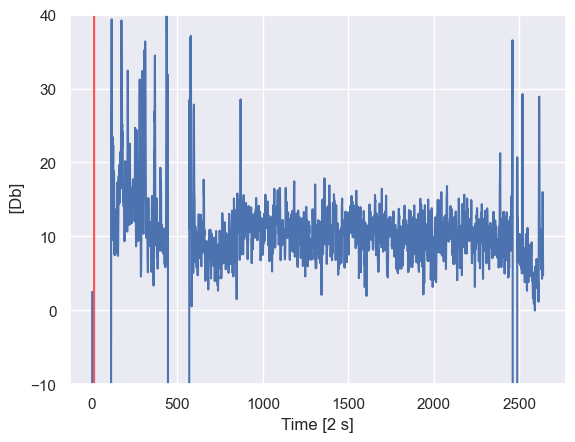

In [35]:
ax = sns.lineplot(x=df_data.index, y=df_data[0])
ax.set_ylim(-10,40)
ax.set_ylabel(' [Db]')
ax.set_xlabel('Time [2 s]')

# Mark when awake
ax.axvspan(8, 14, alpha=0.5, color='red')


In [29]:
state_cur = None

state_changes = pd.DataFrame()

for i, state in enumerate(df_data_54_l.values):
    state_curr = pd.DataFrame()
    if (state[0] != state_cur) and (type(state[0]) != type(np.nan)):
        print(state[0])
        state_cur = state[0]
        state_curr['index'] = [i]
        state_curr['state'] = state
    state_changes = pd.concat([state_changes, state_curr])
state_changes


1.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


,index,state
0,0,1.0
0,179,NaN
0,180,NaN
0,181,NaN
0,182,NaN
...,...,...
0,955,NaN
0,956,NaN
0,957,NaN
0,958,NaN


Text(0.5, 0, 'Frequency')

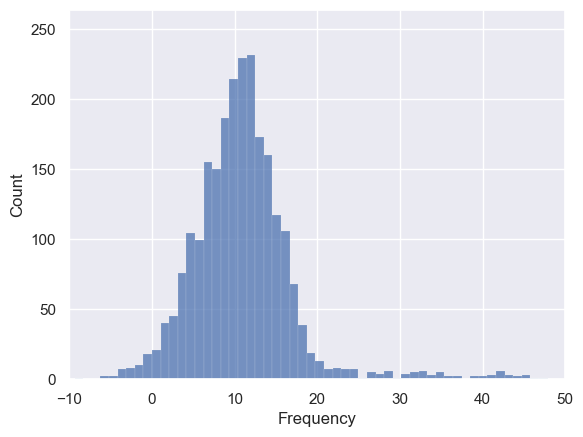

In [6]:
ax = sns.histplot(data=df_data_54_Sdb_pp[0])
ax.set_xlim(-10,50)
ax.set_xlabel('Frequency')